
(a) Use the pd.read_csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/MyDrive/fintech HW/HW0916/College.csv'

import os
if not os.path.exists(file_path):
  print(f"檔案不存在: {file_path}")
else:
  df = pd.read_csv(file_path)

  print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4        

(b) Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice that the first column is just the name of each university in a column named something like Unnamed: 0. We don’t really want pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames:

In [ ]:
college2 = pd.read_csv(file_path, index_col=0)

college3 = df.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')

college = college3

print(college.head())


                             Private  Apps  Accept  Enroll  Top10perc  \
College                                                                 
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
College                                                                       
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific

(c)Use the describe() method of to produce a numerical summary of the variables in the data set.

In [ ]:
summary = college.describe()

print(summary)

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

(d)Use the pd.plotting.scatter_matrix() function to produce a scatterplotmatrixofthefirstcolumns[Top10perc, Apps, Enroll]. Recall that you can reference a list C of columns of a data frame
A using A[C].

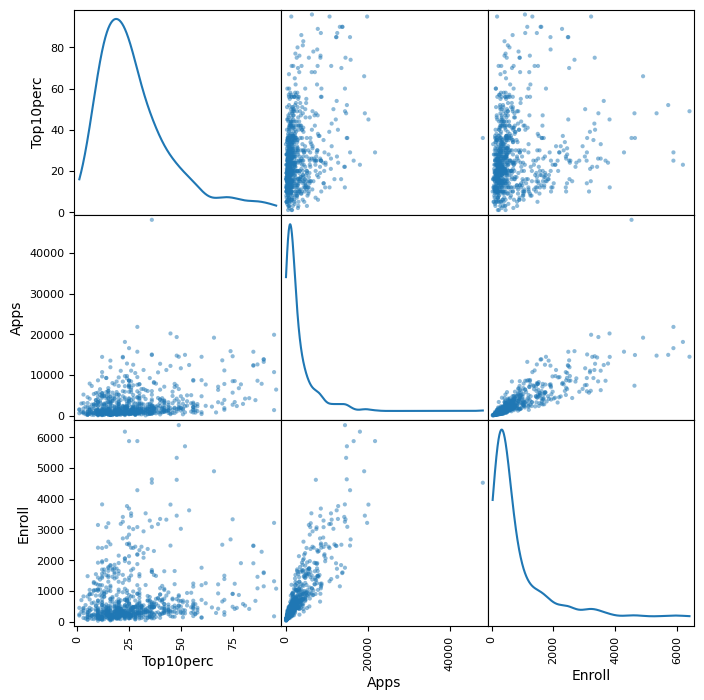

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ['Top10perc', 'Apps', 'Enroll']
scatter_data = college[columns]

pd.plotting.scatter_matrix(scatter_data, figsize=(8, 8), diagonal='kde')

plt.show()


(e) Use the boxplot() method of college to produce side-by-side boxplots of Outstate versus Private.

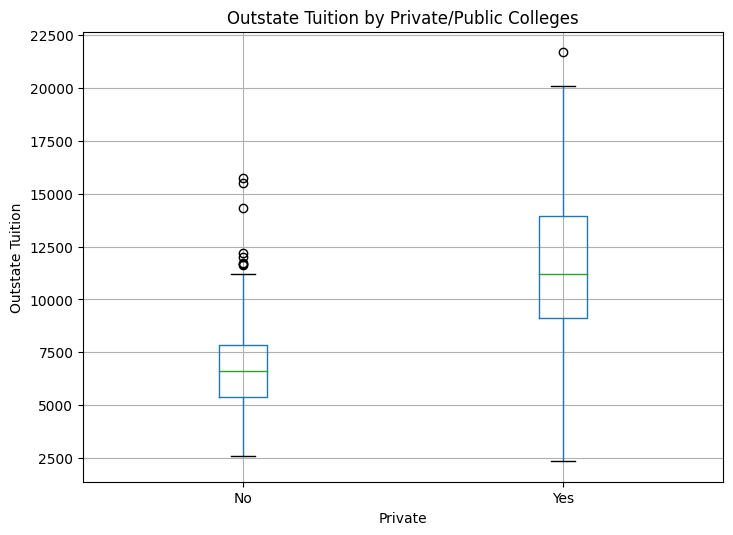

In [ ]:
import matplotlib.pyplot as plt

college.boxplot(column='Outstate', by='Private', figsize=(8, 6))

plt.title('Outstate Tuition by Private/Public Colleges')
plt.suptitle('')
plt.xlabel('Private')
plt.ylabel('Outstate Tuition')

plt.show()


(f) Create a new qualitative variable, called Elite, by binning the Top10perc variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.
Use the value_counts() method of college['Elite'] to see how many elite universities there are. Finally, use the boxplot() method again to produce side-by-side boxplots of Outstate versus Elite.

Elite
No     699
Yes     78
Name: count, dtype: int64


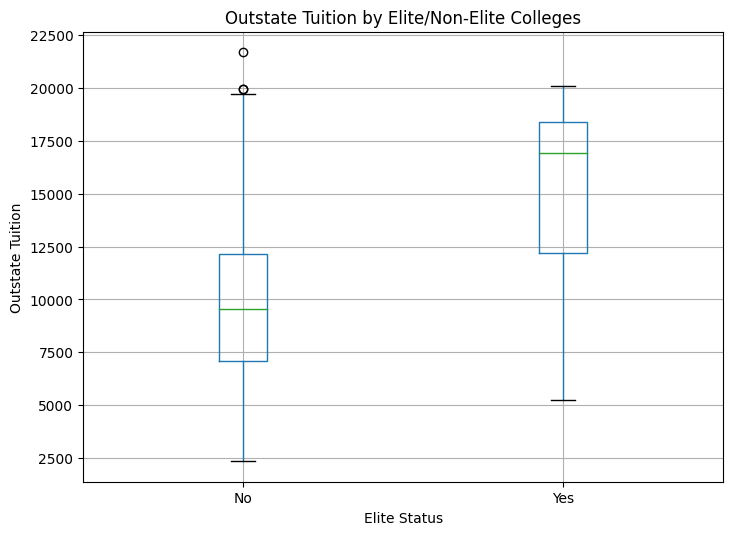

In [ ]:
college['Elite'] = pd.cut(college['Top10perc'], bins=[0, 50, 100], labels=['No', 'Yes'])

elite_counts = college['Elite'].value_counts()
print(elite_counts)

college.boxplot(column='Outstate', by='Elite', figsize=(8, 6))

plt.title('Outstate Tuition by Elite/Non-Elite Colleges')
plt.suptitle('')
plt.xlabel('Elite Status')
plt.ylabel('Outstate Tuition')

plt.show()


(g) Use the plot.hist() method of college to produce some his- tograms with differing numbers of bins for a few of the quanti- tative variables. The command plt.subplots(2, 2) may be use- ful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.

<Axes: ylabel='Frequency'>

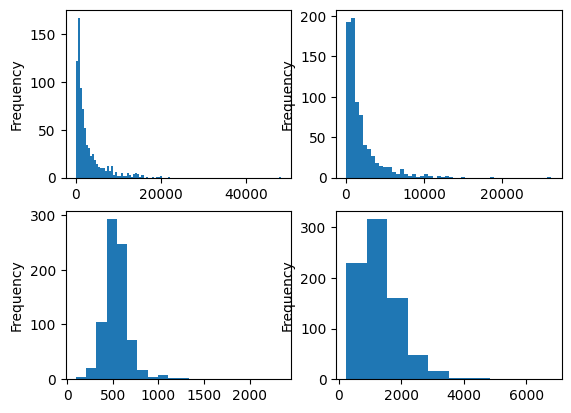

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2)
college['Apps'].plot.hist(ax=ax[0,0], bins = 100)
college['Accept'].plot.hist(ax=ax[0,1], bins = 50)
college['Books'].plot.hist(ax=ax[1,0], bins = 20)
college['Personal'].plot.hist(ax=ax[1,1], bins = 10)

(h) Continue exploring the data, and provide a brief summary of what you discover.

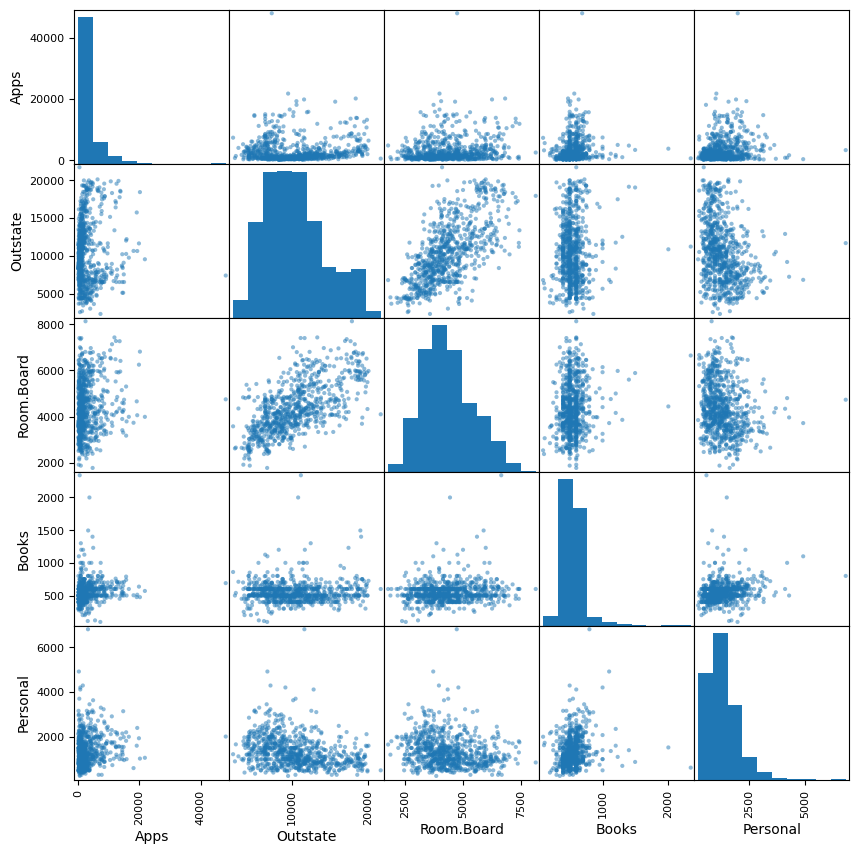

                Apps  Outstate  Room.Board     Books  Personal
Apps        1.000000  0.050159    0.164939  0.132559  0.178731
Outstate    0.050159  1.000000    0.654256  0.038855 -0.299087
Room.Board  0.164939  0.654256    1.000000  0.127963 -0.199428
Books       0.132559  0.038855    0.127963  1.000000  0.179295
Personal    0.178731 -0.299087   -0.199428  0.179295  1.000000


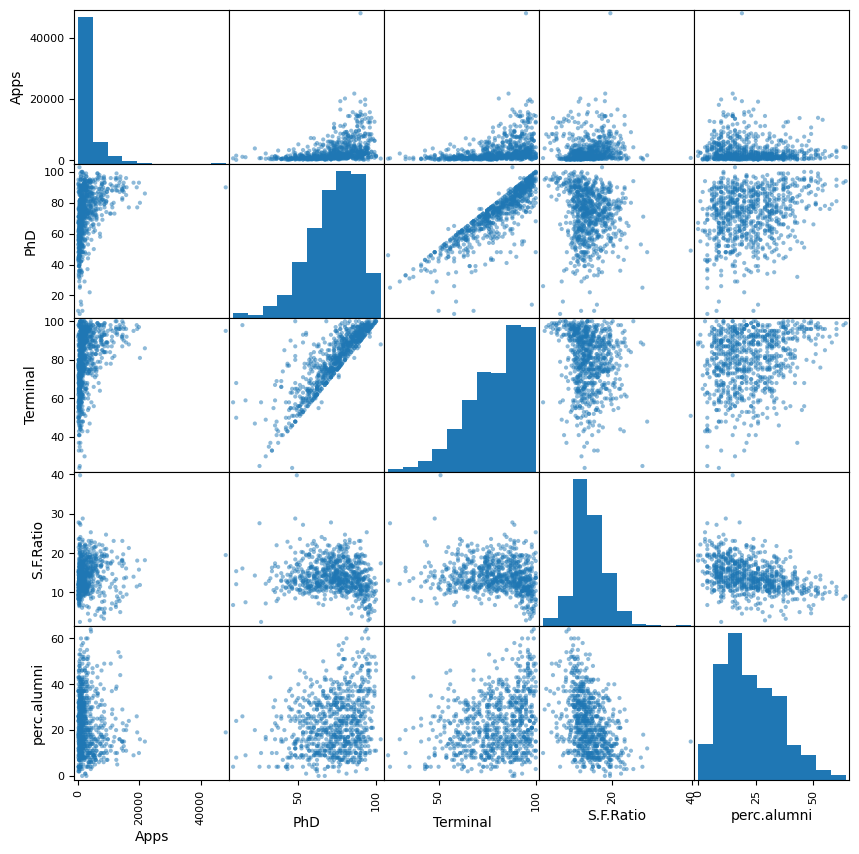

                 Apps       PhD  Terminal  S.F.Ratio  perc.alumni
Apps         1.000000  0.390697  0.369491   0.095633    -0.090226
PhD          0.390697  1.000000  0.849587  -0.130530     0.249009
Terminal     0.369491  0.849587  1.000000  -0.160104     0.267130
S.F.Ratio    0.095633 -0.130530 -0.160104   1.000000    -0.402929
perc.alumni -0.090226  0.249009  0.267130  -0.402929     1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(college[['Apps', 'Outstate', 'Room.Board', 'Books', 'Personal']], figsize=(10, 10))
plt.show()

corr1 = college[['Apps', 'Outstate', 'Room.Board', 'Books', 'Personal']].corr()
print(corr1)

pd.plotting.scatter_matrix(college[['Apps', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni']], figsize=(10, 10))
plt.show()

corr2 = college[['Apps', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni']].corr()
print(corr2)


First Group of Variables (Apps, Outstate, Room.Board, Books, Personal):

The correlation table shows a moderate positive correlation (0.654) between Outstate (out-of-state tuition) and Room.Board (room and board costs). This suggests that universities with higher room and board costs often also charge higher out-of-state tuition fees.
There is a low positive correlation (0.179) between Apps (number of applications) and Personal (personal expenses). This might indicate that universities with more applicants tend to have slightly higher personal expenses for students, but the correlation is not strong.
Second Group of Variables (Apps, PhD, Terminal, S.F.Ratio, perc.alumni):

There is a very high correlation (0.849) between PhD (percentage of faculty with Ph.D.s) and Terminal (percentage of faculty with terminal degrees). This indicates that the proportion of faculty with Ph.D.s closely matches those with terminal degrees, which is expected since Ph.D.s are often the highest academic degree.
S.F.Ratio (student-faculty ratio) and perc.alumni (percentage of alumni donations) have a negative correlation (-0.403). This means that universities with lower student-faculty ratios (i.e., fewer students per faculty member) tend to have higher alumni donation rates. This could be because universities with lower ratios may provide closer faculty-student interactions, leading to greater alumni satisfaction.
Summary:

From these two correlation tables and scatterplots, we can observe the difference between push factors and pull factors. Push factors (such as the number of applications and tuition fees) have some correlation, but their influence is not as strong as pull factors (such as faculty qualifications and university resources). The pull factors seem to have a stronger impact, as faculty academic background and university resources (such as room and board costs) significantly affect a university's overall attractiveness.






